Map subtypes to 19pcw and 14pcw data. Save the results and produce cell type maps.

Load libraries and data:

In [1]:
import sys,os
path = '/nfs/team283/aa16/KR_NAS/'
os.chdir(path)
sys.path.append(path)

In [2]:
import pickle
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
data_type = 'float32'
os.environ["THEANO_FLAGS"] = 'device=cuda,floatX=' + data_type + ',force_device=True' + ',dnn.enabled=False'
import isctools
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda: Tesla V100-SXM2-32GB (0000:62:00.0)


In [3]:
adata_wta = pickle.load(open(path + "data/nanostringWTA_fetailBrain_AnnData.p", "rb" ))

In [4]:
adata_wta = adata_wta[adata_wta.obs['GoodQuality'],:]

In [5]:
meanExpression_sc = pd.read_csv(path + "../KR_NAS/data/subclusterMeans.csv", index_col=0)

Find ligands expressed in interneurons and plot their expression:

In [6]:
### Load CellPhoneDB data ###

genes = pd.read_csv('../data/CellPhoneDB/gene_input.csv')
proteins = pd.read_csv('../data/CellPhoneDB/protein_input.csv')

### Remove duplicate protein names (probably due to different gene names for same protein in Ensemble)

genes = genes.drop_duplicates(subset = 'uniprot')
genes.index = genes['uniprot']
proteins = pd.read_csv('../data/CellPhoneDB/protein_input.csv')
proteins = proteins.drop_duplicates(subset = 'uniprot')
genes = genes.reindex(np.array(proteins['uniprot']))

### Find receptors detected in each group of AOIs:

genes_ligand = np.array(genes['gene_name'].iloc[np.invert(np.array(proteins['receptor']))])

In [7]:
genes_ligand = np.array([g for g in genes_ligand if g in meanExpression_sc.index])

104


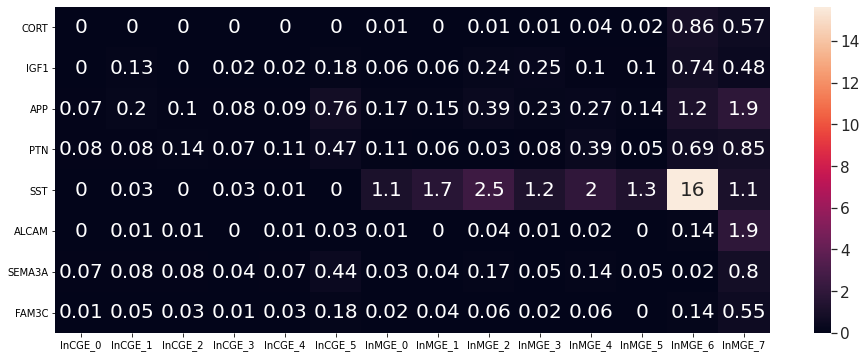

In [8]:
example_genes = genes_ligand
example_types = np.array(('InCGE_0','InCGE_1','InCGE_2','InCGE_3','InCGE_4','InCGE_5',
                          'InMGE_0','InMGE_1','InMGE_2','InMGE_3','InMGE_4','InMGE_5','InMGE_6','InMGE_7'))
example_genes = example_genes[np.sum(meanExpression_sc.loc[example_genes,example_types], axis = 1) > 0.1]
print(len(example_genes))
# Plot cell type specific expression of genes:
# fig, ax = plt.subplots(figsize=(16,50))
# sns.set(font_scale=1.4)
# sns.heatmap(np.round(meanExpression_sc.loc[example_genes,example_types],2), annot = True,  annot_kws={"size": 20})
# plt.show()
example_genes = np.array(('CORT', 'IGF1', 'APP', 'PTN', 'SST', 'ALCAM', 'SEMA3A', 'FAM3C'))
fig, ax = plt.subplots(figsize=(16,6))
sns.set(font_scale=1.4)
sns.heatmap(np.round(meanExpression_sc.loc[example_genes,example_types],2), annot = True,  annot_kws={"size": 20})
plt.savefig('InSubtypes_differentialExpressedLigands.pdf')

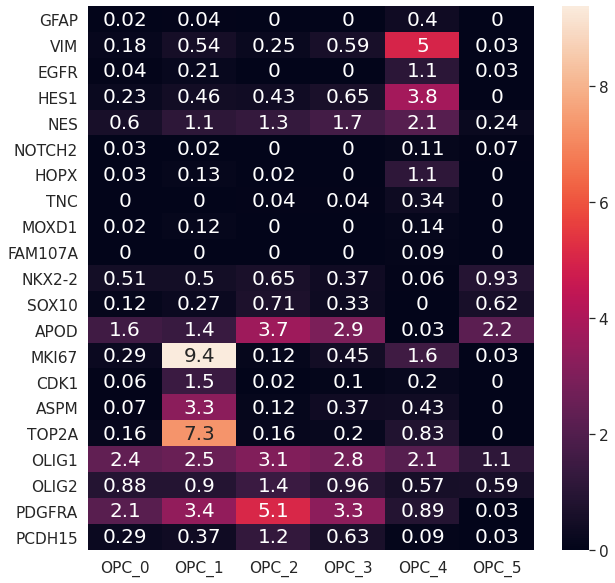

In [9]:
example_genes = np.array(('GFAP', 'VIM', 'EGFR', 'HES1', 'NES', 'NOTCH2',
                         'HOPX', 'TNC', 'MOXD1', 'FAM107A', 'NKX2-2', 'SOX10', 'APOD',
                         'MKI67', 'CDK1', 'ASPM', 'TOP2A',
                         'OLIG1', 'OLIG2', 'PDGFRA', 'PCDH15'))
example_types = np.array(('OPC_0', 'OPC_1','OPC_2','OPC_3','OPC_4', 'OPC_5'))
# Plot cell type specific expression of genes:
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.4)
sns.heatmap(np.round(meanExpression_sc.loc[example_genes,example_types],2), annot = True,  annot_kws={"size": 20})
plt.savefig('OPCsubtypes_markerExpression.pdf')

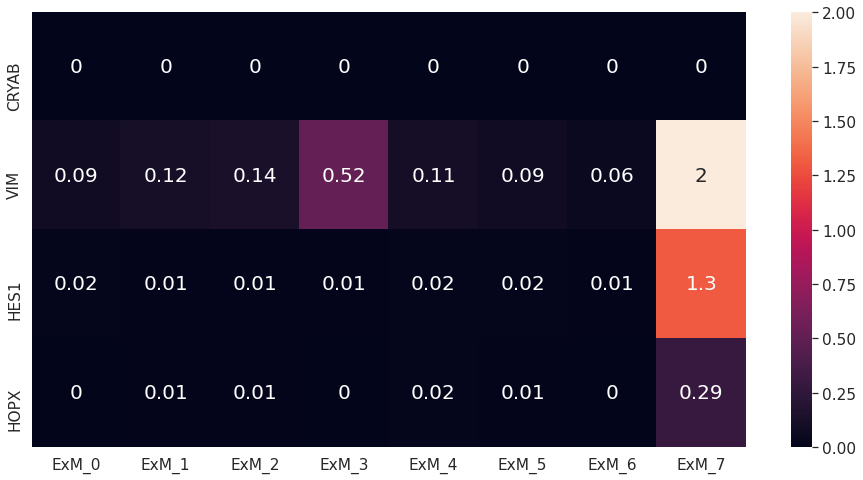

In [10]:
example_genes = np.array(('CRYAB', 'VIM', 'HES1', 'HOPX'))
example_types = np.array(('ExM_0', 'ExM_1', 'ExM_2', 'ExM_3','ExM_4','ExM_5','ExM_6','ExM_7'))
# Plot cell type specific expression of genes:
fig, ax = plt.subplots(figsize=(16,8))
sns.set(font_scale=1.4)
sns.heatmap(np.round(meanExpression_sc.loc[example_genes,example_types],2), annot = True,  annot_kws={"size": 20})
plt.savefig('ExMSubtypes_markerExpression.pdf')

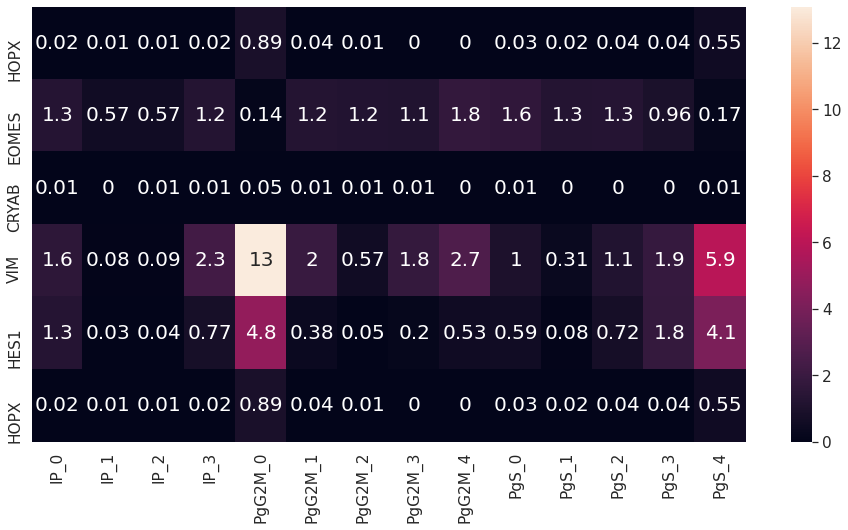

In [11]:
example_genes = np.array(('HOPX', 'EOMES', 'CRYAB', 'VIM', 'HES1', 'HOPX'))
example_types = np.array(('IP_0', 'IP_1', 'IP_2', 'IP_3', 'PgG2M_0', 'PgG2M_1', 'PgG2M_2',
                          'PgG2M_3', 'PgG2M_4', 'PgS_0', 'PgS_1', 'PgS_2', 'PgS_3', 'PgS_4'))
# Plot cell type specific expression of genes:
fig, ax = plt.subplots(figsize=(16,8))
sns.set(font_scale=1.4)
sns.heatmap(np.round(meanExpression_sc.loc[example_genes,example_types],2), annot = True,  annot_kws={"size": 20})

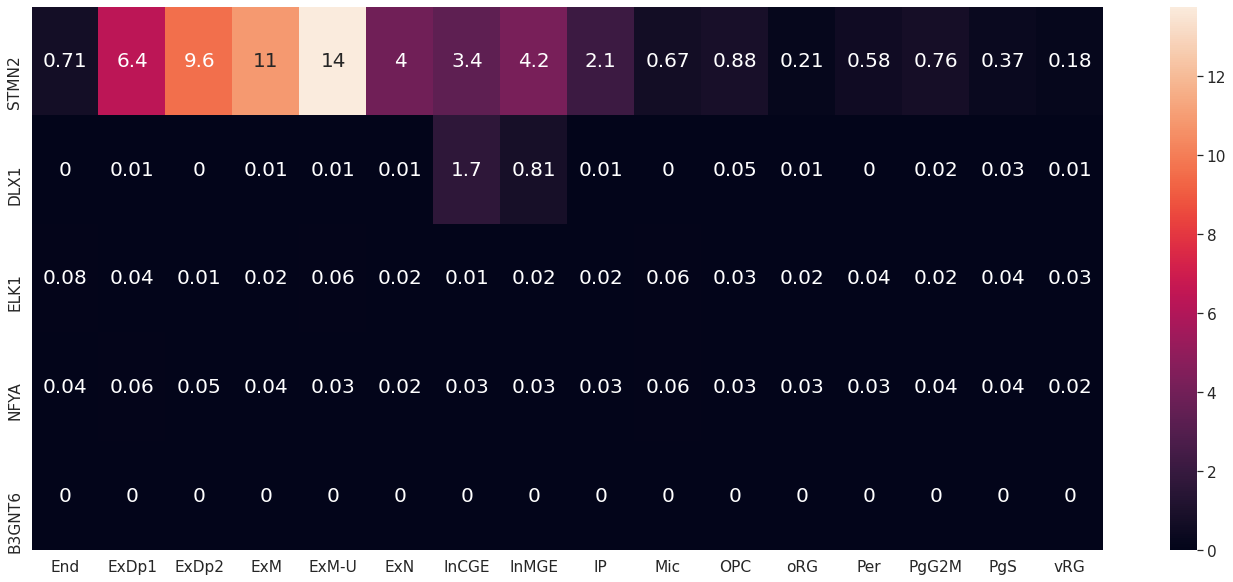

In [16]:
# Get reference scRNAseq data:
meanExpression_sc1 = pd.read_csv(path + "data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)

# Make our gene list:
lookup_genes = np.array(('STMN2','DLX1','ELK1', 'NFYA','B3GNT6'))

# Plot cell type specific expression of genes:
fig, ax = plt.subplots(figsize=(24,10))
sns.set(font_scale=1.4)
sns.heatmap(np.round(meanExpression_sc1.loc[lookup_genes,:],2), annot = True,  annot_kws={"size": 20})

plt.savefig('../KR_NAS/0_publication_figures/Figure4_scRNAseqExampleGenes.pdf')